### Convolutional Network

In [86]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.5],[.5])])

In [65]:
trainset = torchvision.datasets.MNIST(root ="./data",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(trainset,batch_size = 4,shuffle = True,num_workers= 2)
testset = torchvision.datasets.MNIST(root="./data",train=False,download=True,transform = transform)
test_loader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers =2)

In [66]:
img,lab = trainset.__getitem__(30)
img.shape,lab

(torch.Size([1, 28, 28]), 3)

In [ ]:
img[0] # the tensor for one image

In [41]:
def plot_tensor(torch_tensor):
  plt.imshow(torch_tensor,cmap = "gray")
  plt.show()

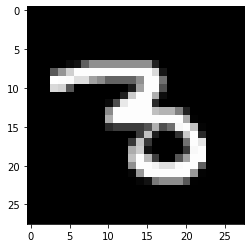

In [67]:
plot_tensor(img[0])

In [68]:
data_iter = iter(train_loader)
img,lab = data_iter.next()

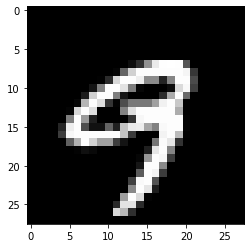

In [69]:
plot_tensor(img[0][0])

In [80]:
for i in range(trainset.__len__()): ## problems, we need in setattr
  img,lab = trainset.__getitem__(i)
  img = (img- 0.5)/0.5

In [ ]:
img,lab = trainset.__getitem__(11)
img

In [77]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.5],[.5])])
trainset = torchvision.datasets.MNIST(root ="./data",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(trainset,batch_size = 4,shuffle = True,num_workers= 2)
testset = torchvision.datasets.MNIST(root="./data",train=False,download=True,transform = transform)
test_loader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers =2)

In [81]:
img,lab = trainset.__getitem__(0)
img[0]

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

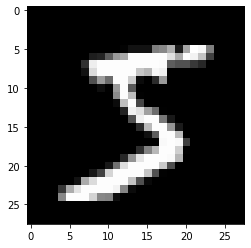

In [82]:
plot_tensor(img[0])

In [101]:
class SimpleConvNet(nn.Module):
  def __init__(self):
    # вызов конструктора предка
    super(SimpleConvNet,self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1,out_channels = 6,kernel_size = 5)
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels = 16, kernel_size =5)
    self.fc1 = nn.Linear(4*4*16,120)
    self.fc2 = nn.Linear(120,84)
    self.output = nn.Linear(84,10)

  def forward (self,x):
    x = self.pool(self.conv1(x))
    x = self.pool(self.conv2(x))
    # print(x.shape)
    x = x.view(-1,4*4*16)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.output(x)
    return x

In [102]:
Net = SimpleConvNet()
optimizer =torch.optim.Adam(Net.parameters(),lr=1e-3)
num_epochs = 2
Net.train()

SimpleConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=10, bias=True)
)

In [103]:
def get_cross_entropy(value_1,value_2):
  return torch.nn.functional.cross_entropy(value_1,value_2)

In [104]:
def train(epoch, num_epochs,train_loader,optimizer):
  losses,losso = [],[]
  run_loss = 0
  for batch_idx,(data,target) in enumerate(train_loader):
    data,target = Variable(data),Variable(target)
    optimizer.zero_grad()
     
    output = Net(data)
    loss = get_cross_entropy(output,target)
    run_loss += loss.item()
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

    if batch_idx % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %(epoch + 1, batch_idx + 1, run_loss / 2000))
      losso.append(run_loss)
      run_loss = 0.0
  return losses,losso

In [105]:
for epoch in range(num_epochs):
  losses = train(epoch,num_epochs,train_loader,optimizer)

[1,  2000] loss: 0.383
[1,  4000] loss: 0.166
[1,  6000] loss: 0.138
[1,  8000] loss: 0.130
[1, 10000] loss: 0.110
[1, 12000] loss: 0.087
[1, 14000] loss: 0.103
[2,  2000] loss: 0.086
[2,  4000] loss: 0.074
[2,  6000] loss: 0.079
[2,  8000] loss: 0.077
[2, 10000] loss: 0.074
[2, 12000] loss: 0.084
[2, 14000] loss: 0.082


In [112]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
classes = tuple(str(i) for i in range(10))
Net.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        y_pred = Net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 96 %
Accuracy of     1 : 98 %
Accuracy of     2 : 96 %
Accuracy of     3 : 98 %
Accuracy of     4 : 99 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 97 %
Accuracy of     8 : 97 %
Accuracy of     9 : 96 %
